In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter

In [2]:
df = pd.read_csv("dis_sym_dataset_comb.csv")


In [3]:
df.head()

,label_dis,abdominal cramp,abdominal distention,abnormal behavior,abnormal bleeding,abnormal sensation,abnormally frequent,abscess,aching,acne,...,wet,wheezing,white patch vaginal discharge,widespread pain,withdrawal occurring stopping,worrying,yellow skin,yellowish coloration skin white eye,yellowish skin,yellowish skin crust
0,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8835 entries, 0 to 8834
Columns: 490 entries, label_dis to yellowish skin crust
dtypes: int64(489), object(1)
memory usage: 33.0+ MB


In [5]:
df.shape

(8835, 490)

In [6]:
df.describe()

,abdominal cramp,abdominal distention,abnormal behavior,abnormal bleeding,abnormal sensation,abnormally frequent,abscess,aching,acne,acquiring drinking alcohol taking lot time,...,wet,wheezing,white patch vaginal discharge,widespread pain,withdrawal occurring stopping,worrying,yellow skin,yellowish coloration skin white eye,yellowish skin,yellowish skin crust
count,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,...,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000,8835.000000
mean,0.000905,0.007244,0.000905,0.001811,0.001811,0.000905,0.028976,0.001811,0.030787,0.001811,...,0.000905,0.001811,0.000226,0.000453,0.001811,0.000453,0.001811,0.000226,0.003169,0.000226
std,0.030079,0.084807,0.030079,0.042519,0.042519,0.030079,0.167748,0.042519,0.172749,0.042519,...,0.030079,0.042519,0.015045,0.021274,0.042519,0.021274,0.042519,0.015045,0.056210,0.015045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

label_dis                              0
abdominal cramp                        0
abdominal distention                   0
abnormal behavior                      0
abnormal bleeding                      0
                                      ..
worrying                               0
yellow skin                            0
yellowish coloration skin white eye    0
yellowish skin                         0
yellowish skin crust                   0
Length: 490, dtype: int64

In [8]:
s_data_v1 = df.loc[:, df.columns.notna()]

In [9]:
target_variable = ['label_dis']
label = LabelEncoder()
for i in target_variable:
    s_data_v1[i] = label.fit_transform(s_data_v1[i])

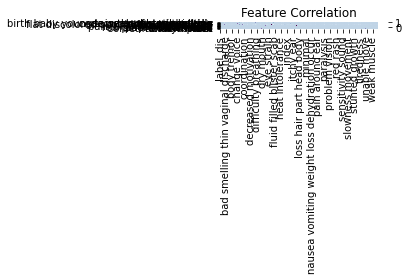

In [10]:
correlation = s_data_v1.corr()

sns.heatmap(correlation,cmap="BuPu")

plt.title("Feature Correlation")

plt.tight_layout()

plt.show()

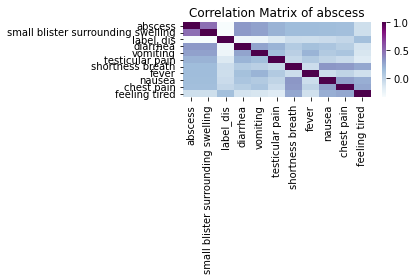

In [11]:
target_disease = 'abscess'

top_correlations = s_data_v1.corr()[target_disease].abs().nlargest(11).index
subset_data = s_data_v1[top_correlations]


correlation = subset_data.corr()


sns.heatmap(correlation, cmap="BuPu")


plt.title(f"Correlation Matrix of {target_disease}")


plt.tight_layout()

plt.show()


In [12]:
X = s_data_v1.drop(columns="label_dis")
y = s_data_v1['label_dis']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("train data :", X_train, X_train.shape)
print("\ntest data :", X_test, X_test.shape)
print("\ntrain target :", y_train, y_train.shape)
print("\ntest target :", y_test, y_test.shape)

train data :       abdominal cramp  abdominal distention  abnormal behavior  \
3866                0                     0                  0   
7886                0                     0                  0   
4912                0                     0                  0   
2826                0                     0                  0   
1070                0                     0                  0   
...               ...                   ...                ...   
2018                0                     0                  0   
2679                0                     0                  0   
8670                0                     0                  0   
4354                0                     0                  0   
8053                0                     0                  0   

      abnormal bleeding  abnormal sensation  abnormally frequent  abscess  \
3866                  0                   0                    0        0   
7886                  0                 

In [14]:
print(X_train)

      abdominal cramp  abdominal distention  abnormal behavior  \
3866                0                     0                  0   
7886                0                     0                  0   
4912                0                     0                  0   
2826                0                     0                  0   
1070                0                     0                  0   
...               ...                   ...                ...   
2018                0                     0                  0   
2679                0                     0                  0   
8670                0                     0                  0   
4354                0                     0                  0   
8053                0                     0                  0   

      abnormal bleeding  abnormal sensation  abnormally frequent  abscess  \
3866                  0                   0                    0        0   
7886                  0                   0          

In [15]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

y_predict = model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_predict)
print("Accuracy : ", dt_accuracy)

Accuracy :  0.8047538200339559


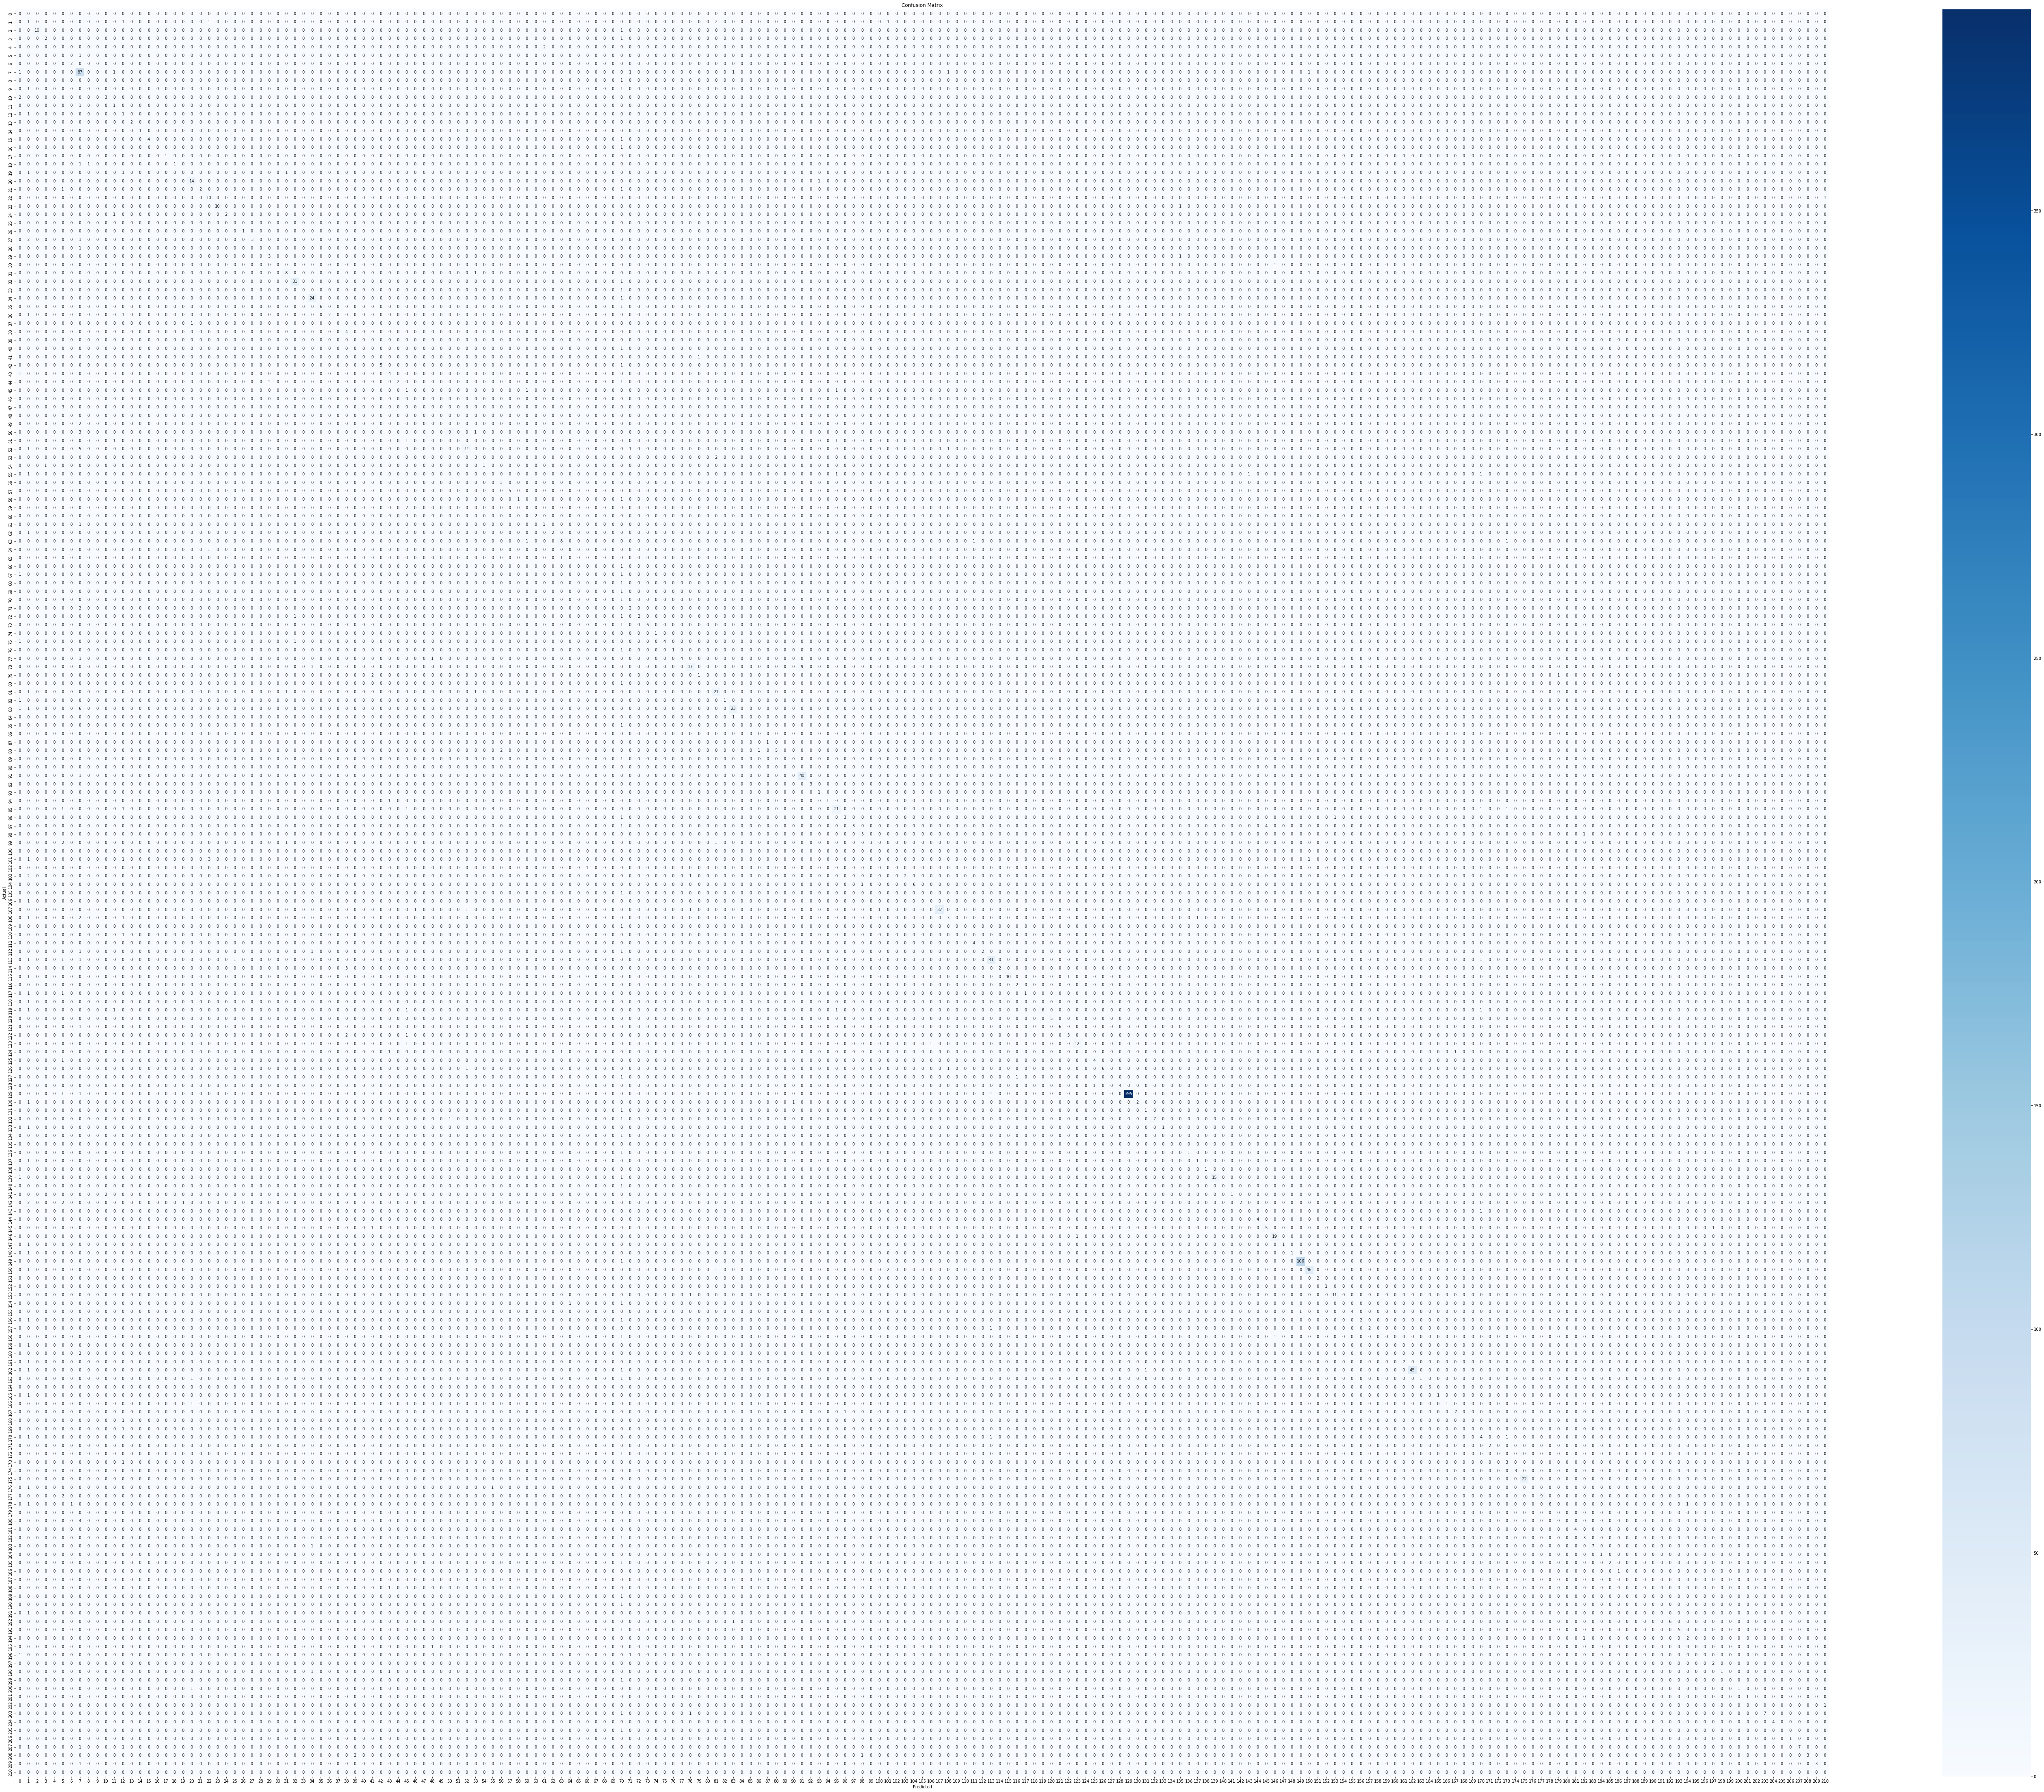

In [17]:
conf_mat = confusion_matrix(y_test, y_predict)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(100,80))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

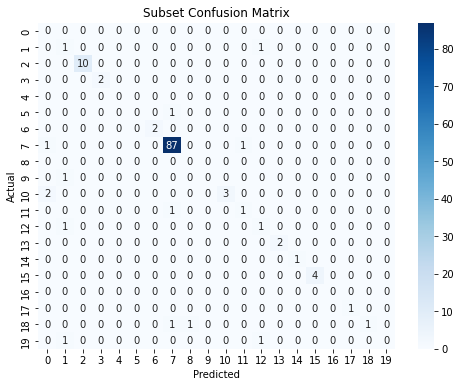

In [18]:
conf_mat = confusion_matrix(y_test, y_predict)

# Define the range of rows and columns you want to display
rows_to_display = 20
columns_to_display = 20

# Extract the subset of the confusion matrix
subset_conf_mat = conf_mat[:rows_to_display, :columns_to_display]

# Plot the subset confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset_conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Subset Confusion Matrix')
plt.show()

In [19]:

dt_clf_report = classification_report(y_test, y_predict)
print("\nClassification Report : ")
print(dt_clf_report)


Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           3       0.03      0.17      0.04         6
           5       1.00      0.91      0.95        11
           7       0.67      0.67      0.67         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          14       0.67      1.00      0.80         2
          15       0.69      0.94      0.79        93
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          18       0.60      0.60      0.60         5
          19       0.20      0.50      0.29         2
          20       0.08      0.50      0.14         2
          21       1.00      1.00      1.00         2
          22       1.00      1.00      1.00         1
          24       1.00      0.80      0.89         5
          25       0.00      0.00      0.00         1
 

In [20]:
from sklearn.model_selection import cross_val_score
dt_score = cross_val_score(model, X, y, cv=3)
print("\nCross Validation Score : ", dt_score)


Cross Validation Score :  [0.65568761 0.88217317 0.94634975]


In [21]:

model2 = GaussianNB()

model2.fit(X_train, y_train)

GaussianNB()

In [22]:

y_predict = model2.predict(X_test)


nb_accuracy = accuracy_score(y_test, y_predict)
print("Accuracy : ", nb_accuracy*100)


Accuracy :  89.19071873231465


In [23]:

nb_clf_report = classification_report(y_test, y_predict)
print("\nClassification Report : ")
print(nb_clf_report)


Classification Report : 
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           5       1.00      1.00      1.00        11
           7       0.75      1.00      0.86         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         2
          15       1.00      0.94      0.97        93
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.67         2
          18       1.00      1.00      1.00         5
          19       0.00      0.00      0.00         2
          20       1.00      0.50      0.67         2
          21       1.00      1.00      1.00         2
          22       1.00      1.00      1.00         1
          24       1.00      1.00      1.00         5
          25       0.00      0.00      0.00         1
          26       1.00      1.00      1.00         1
 

In [24]:

nb_score = cross_val_score(model2, X, y, cv=3)
print("\nCross Validation Score : ", nb_score)


Cross Validation Score :  [0.78981324 0.94329372 0.98370119]


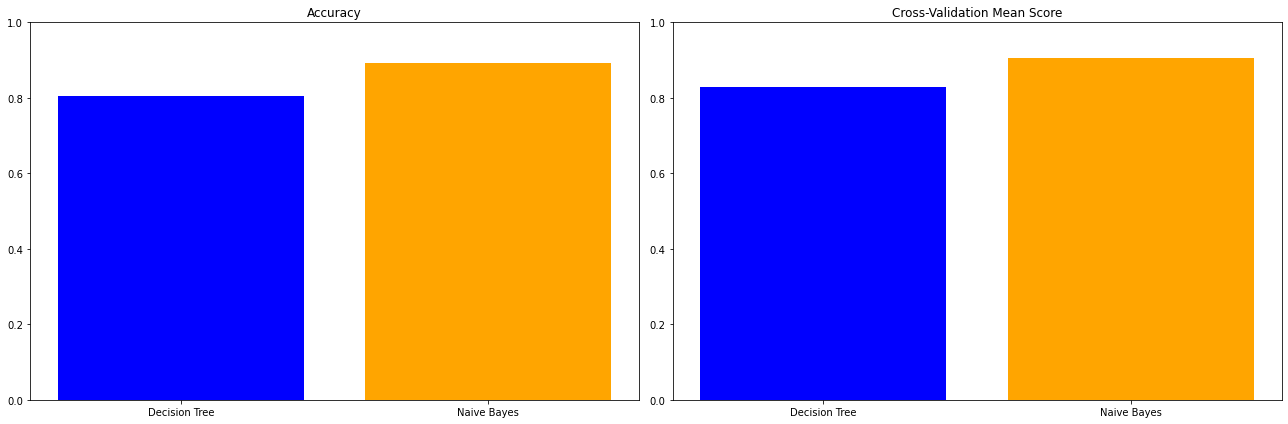

In [25]:
dt_metrics = dt_clf_report
nb_metrics = nb_clf_report

dt_cv_scores = dt_score
nb_cv_scores = nb_score

data = {
    'Model': ['Decision Tree', 'Naive Bayes'],
    'Accuracy': [dt_accuracy, nb_accuracy],
    'Cross-Validation Mean Score': [np.mean(dt_cv_scores), np.mean(nb_cv_scores)]
}

df_comparison = pd.DataFrame(data)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Bar chart for Accuracy
axes[0].bar(df_comparison['Model'], df_comparison['Accuracy'], color=['blue', 'orange'])
axes[0].set_title('Accuracy')
axes[0].set_ylim(0, 1)

# Bar chart for Cross-Validation Mean Score
axes[1].bar(df_comparison['Model'], df_comparison['Cross-Validation Mean Score'], color=['blue', 'orange'])
axes[1].set_title('Cross-Validation Mean Score')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

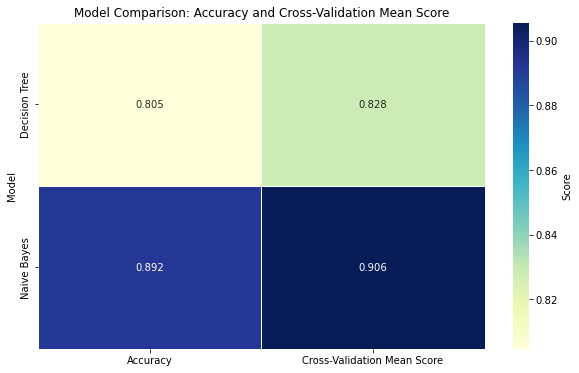

In [26]:
df_comparison = pd.DataFrame(data)

heatmap_data = pd.pivot_table(df_comparison, values=['Accuracy', 'Cross-Validation Mean Score'], index='Model')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=.5, fmt='.3f', cbar_kws={'label': 'Score'})
plt.title('Model Comparison: Accuracy and Cross-Validation Mean Score')
plt.show()

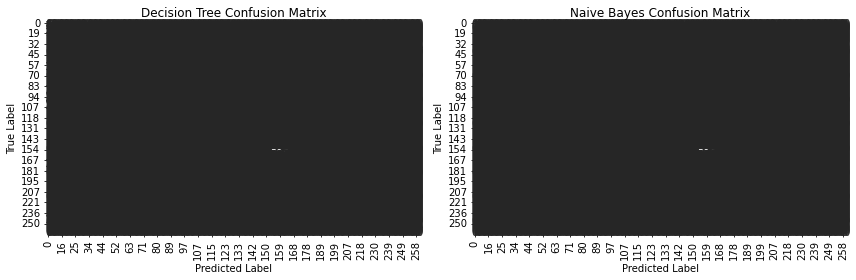

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming model and model2 are your classifiers, and X_test, y_test are your test data.
dt_predictions = model.predict(X_test)
nb_predictions = model2.predict(X_test)

# Get unique classes from both y_test and predictions
classes = np.unique(np.concatenate((y_test, dt_predictions, nb_predictions)))

# Get confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions, labels=classes)
nb_cm = confusion_matrix(y_test, nb_predictions, labels=classes)

# Create DataFrames from confusion matrices
dt_cm_df = pd.DataFrame(dt_cm, index=classes, columns=classes)
nb_cm_df = pd.DataFrame(nb_cm, index=classes, columns=classes)

# Plot confusion matrices using seaborn heatmap
plt.figure(figsize=(12, 4))

# Decision Tree Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dt_cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Naive Bayes Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(nb_cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


In [28]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[ 1  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  0]]


In [29]:
doc_data = pd.read_csv("medicine.csv",encoding='latin1', names=['label_dis','Drug'])

In [30]:
test_col = [col for col in s_data_v1.columns if col != 'label_dis']
test_data = {}
symptoms = []
predicted = []

def test_input():
    symptoms.clear()
    predicted.clear()

    num_inputs = int(input("Enter the number of symptoms you have: "))

    for i in range(num_inputs):
        user_input = input("Enter Symptoms #{}: ".format(i + 1))
        symptoms.append(user_input)

    print("Symptoms you have:", symptoms)

    for column in test_col:
        test_data[column] = 1 if column in symptoms else 0

    test_df = pd.DataFrame(test_data, index=[0])

    print("Prediction in progress")

    naive_bayes_model = GaussianNB()
    naive_bayes_model.fit(X, y)

    predict_disease = naive_bayes_model.predict(test_df)
    predict_disease = label.inverse_transform(predict_disease)
    predicted.extend(predict_disease)

    disease_counts = Counter(predicted)
    percentage_per_disease = {disease: (count / 1) * 100 for disease, count in disease_counts.items()}
    result_df = pd.DataFrame({"label_dis": list(percentage_per_disease.keys())})

    result_df = result_df.merge(doc_data, on='label_dis', how='left')
    return result_df

In [31]:
test_input()

Symptoms you have: ['cold', 'cough']
Prediction in progress


,label_dis,Drug
0,Adult Inclusion Conjunctivitis,Daru Haldi


In [32]:
import pandas as pd
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

test_col = [col for col in s_data_v1.columns if col != 'label_dis']
test_data = {}
symptoms = []
predicted_nb = []
predicted_dt = []

def test_input1():
    symptoms.clear()
    predicted_nb.clear()
    predicted_dt.clear()

    num_inputs = int(input("Enter the number of symptoms you have: "))

    for i in range(num_inputs):
        user_input = input("Enter Symptoms #{}: ".format(i + 1))
        symptoms.append(user_input)

    print("Symptoms you have:", symptoms)

    for column in test_col:
        test_data[column] = 1 if column in symptoms else 0

    test_df = pd.DataFrame(test_data, index=[0])

    print("Prediction in progress")

    # Naive Bayes Model
    naive_bayes_model = GaussianNB()
    naive_bayes_model.fit(X, y)  # Assuming 'train_data' and 'target_data' are defined

    predict_disease_nb = naive_bayes_model.predict(test_df)
    predict_disease_nb = label.inverse_transform(predict_disease_nb)
    predicted_nb.extend(predict_disease_nb)

    # Decision Tree Model
    decision_tree_model = DecisionTreeClassifier()
    decision_tree_model.fit(X, y)  # Assuming 'train_data' and 'target_data' are defined

    predict_disease_dt = decision_tree_model.predict(test_df)
    predict_disease_dt = label.inverse_transform(predict_disease_dt)
    predicted_dt.extend(predict_disease_dt)

    # Create DataFrames for each model's predictions
    result_df_nb = pd.DataFrame({"label_dis": predicted_nb})
    result_df_dt = pd.DataFrame({"label_dis": predicted_dt})

    # Merge with additional information from 'doc_data'
    result_df_nb = result_df_nb.merge(doc_data, on='label_dis', how='left')
    result_df_dt = result_df_dt.merge(doc_data, on='label_dis', how='left')

    return result_df_nb, result_df_dt


In [33]:
from tabulate import tabulate


def display_output(result_df_nb, result_df_dt):
    # Display Naive Bayes results
    print("Naive Bayes Model Results:")
    print(tabulate(result_df_nb, headers='keys', tablefmt='pretty'))

    # Display Decision Tree results
    print("\nDecision Tree Model Results:")
    print(tabulate(result_df_dt, headers='keys', tablefmt='pretty'))

# Example usage
result_df_nb, result_df_dt = test_input1()
display_output(result_df_nb, result_df_dt)


Symptoms you have: ['cold', 'cough', 'pain']
Prediction in progress
Naive Bayes Model Results:
+---+--------------------------------+------------+
|   |           label_dis            |    Drug    |
+---+--------------------------------+------------+
| 0 | Adult Inclusion Conjunctivitis | Daru Haldi |
+---+--------------------------------+------------+

Decision Tree Model Results:
+---+----------------------------------------------+-------------+
|   |                  label_dis                   |    Drug     |
+---+----------------------------------------------+-------------+
| 0 | Chronic obstructive pulmonary disease (COPD) | Ashwagandha |
+---+----------------------------------------------+-------------+


In [34]:
count = Counter(X_test)
count.items()

dict_items([('abdominal cramp', 1), ('abdominal distention', 1), ('abnormal behavior', 1), ('abnormal bleeding', 1), ('abnormal sensation', 1), ('abnormally frequent', 1), ('abscess', 1), ('aching', 1), ('acne', 1), ('acquiring drinking alcohol taking lot time', 1), ('affected part turning white', 1), ('anemia', 1), ('anxiety', 1), ('arm', 1), ('attack pain', 1), ('back', 1), ('bacterial infection', 1), ('bad breath', 1), ('bad smelling thin vaginal discharge', 1), ('bad smelling vaginal discharge', 1), ('barky cough', 1), ('belching', 1), ('better sitting worse lying', 1), ('birth baby younger week gestational age', 1), ('bleeding gum', 1), ('bleeding skin', 1), ('blindness', 1), ('blindness one eye', 1), ('blister sunlight', 1), ('bloating', 1), ('blood stool', 1), ('blood urine', 1), ('bloody diarrhea', 1), ('blue', 1), ('bluish skin coloration', 1), ('blurred vision', 1), ('blurry vision', 1), ('body tremor', 1), ('bone pain', 1), ('bowed leg', 1), ('breakdown skeletal muscle', 1),

In [36]:
import seaborn as sns
# count of each target class label
plt.figure(figsize = (70, 10))
ax = sns.countplot(X_test, palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()



KeyError: 'column_name'

<Figure size 1440x720 with 0 Axes>

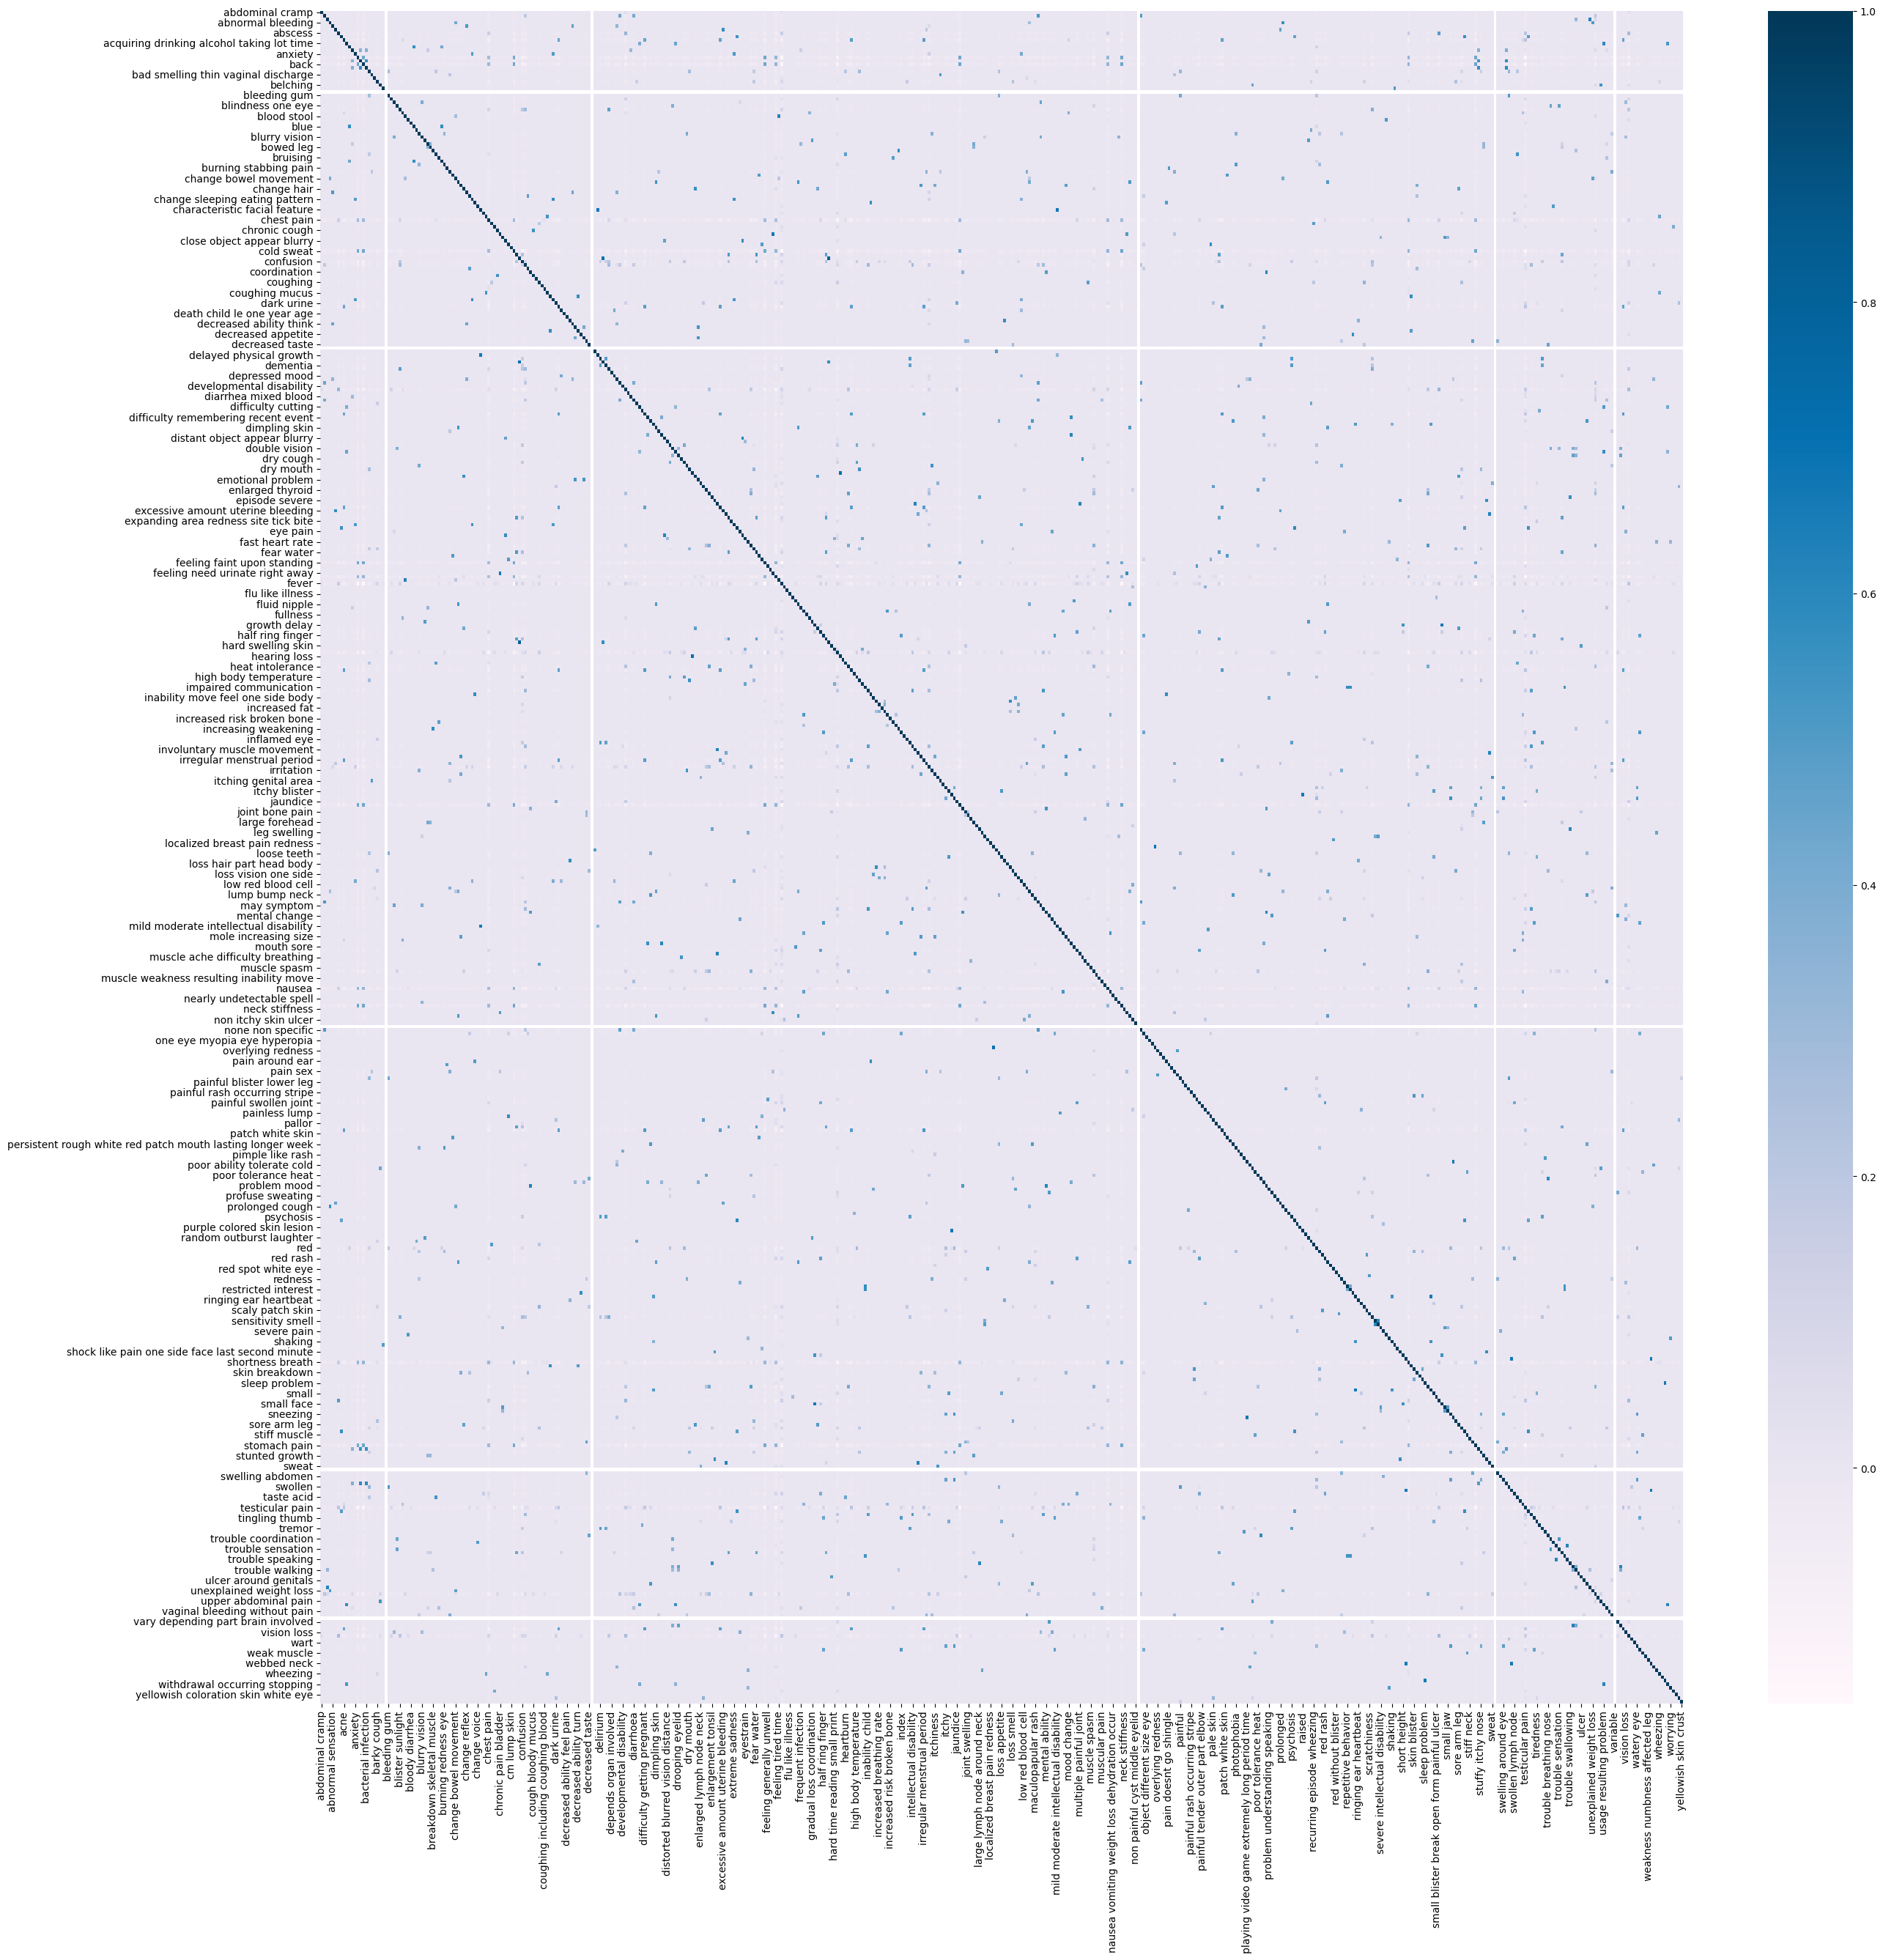

In [ ]:
plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), cmap = 'PuBu', annot = False)
plt.show()

In [37]:
plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), cmap = 'PuBu', annot = False)
plt.show()

KeyError: 'column_name'

<Figure size 1440x720 with 0 Axes>